In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
#Load and inspect data
data = pd.read_csv("Housing.csv")

#Clean data
data = data.dropna() 
data.columns = data.columns.str.strip().str.lower()
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [26]:
#Create target label (binary classification)
#Above-median price = High (1), else Low (0)
data['price_category'] = np.where(data['price'] > data['price'].median(), 1, 0)

#Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

#features and target
X = data.drop(columns=['price', 'price_category'])
y = data['price_category']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

#Confusion Matrix for Random Forest
rf = models["Random Forest"]
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)


Logistic Regression
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.78      0.92      0.85        51
           1       0.92      0.78      0.84        58

    accuracy                           0.84       109
   macro avg       0.85      0.85      0.84       109
weighted avg       0.86      0.84      0.84       109


Random Forest
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        51
           1       0.88      0.76      0.81        58

    accuracy                           0.82       109
   macro avg       0.82      0.82      0.82       109
weighted avg       0.83      0.82      0.82       109



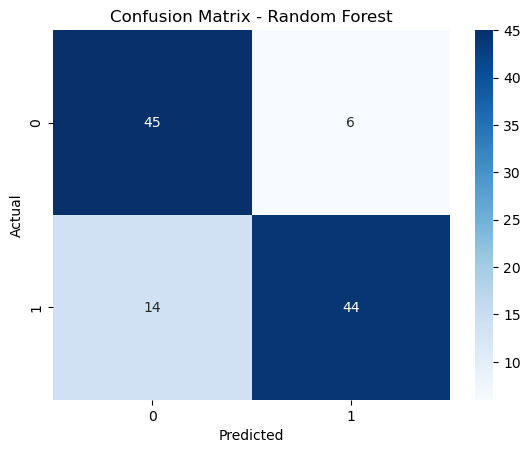

In [28]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

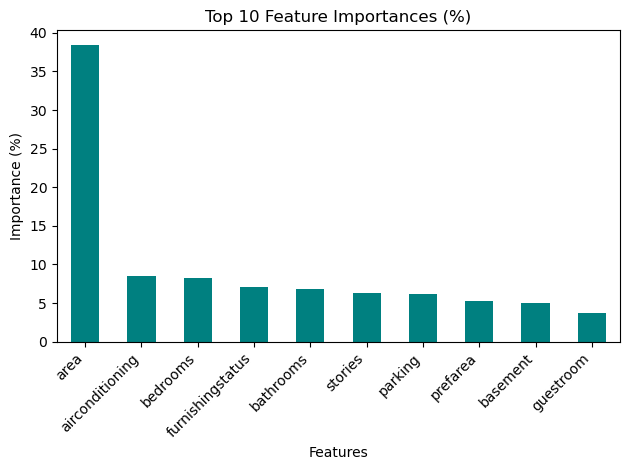

In [48]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False) * 100  # Convert to %
importances.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Feature Importances (%)")
plt.ylabel("Importance (%)")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()